# Campanha de marketing - Analise exploratória de dados

Nosso dataset contém dados interessantes sobre o perfil de clientes de uma loja que comercializa: vinhos, frutas, peixes, doces e outros produtos de linha premium. Também contém dados de campanhas de marketing utilizadas pela loja com intuito de chegar aos clientes e compartilhar as promoçoes dos seus protudos.

Nosso intuito é tirar insights que possam melhorar as vendas da loja, por meio de uma otimização das campanhas de marketing.

Vamos responder as seguintes perguntas:




**1) Qual a receita obtida em cada produto?**

**2) Quantas pessoas cada campanha alcançou?**

**3) Qual campanha obteve a maior receita da loja?**

**4) Qual produto foi o mais vendido em cada campanha?**

**5) Qual perfil de clientes comprou mais produtos depois de receber uma das campanhas?**

**6) Qual a campanha teve mais vendas pelo site?**


### Importando as bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
import networkx as nx
from statsmodels.graphics.mosaicplot import mosaic
sns.set_theme(style="whitegrid")

%matplotlib inline

### Obtendo a base de dados:

In [2]:
df = pd.read_csv('marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


**Dicionário de variáveis:**



*   **ID:** Esta coluna referencia os clientes da loja, cada cliente tem um número identificador único para cada.

*   **Year_Birth:** Contém a data de nascimento do cliente.

*   **Education:** Nível de educação do cliente.

*   **Marital_Status:** Indica qual situação conjugal do cliente.

*   **Income:** Renda anual do cliente.

*   **Kidhome:** Informa a quantidade de crianças residentes com o cliente. Considerando menores de 13 anos.

*   **Teenhome:** Informa a quantidade de adolescentes residentes com o cliente. Considerando adolescentes aqueles entre 13 anos e 19 anos.

*   **Dt_Customer:** Esta coluna retorna a data de cadastro do cliente na base da loja.

*   **Recency:** Número de dias em relação a última compra.

*   **MntWines:** Quantidade em dólares de vinhos comprados nos últimos 2 anos.

*   **MntFruits:** Quantidade em dólares de frutas compradas nos últimos 2 anos.

*   **MntMeatProducts:** Quantidade em dólares de produtos de carne comprados nos últimos 2 anos.

*   **MntFishProducts:** Quantidade em dólares de produtos de peixe comprados nos últimos 2 anos.

*   **MntSweetProducts:** Quantidade em dólares de produtos Sweet adquiridos nos últimos 2 anos.

*   **MntGoldProds:** Quantidade em dólares de produtos Gold adquiridos nos últimos 2 anos

*   **NumDealsPurchases:** Número de compras feitas com desconto.

*   **NumWebPurchases:** Número de compras realizadas através do site da empresa.

*   **NumCatalogPurchases:** Número de compras realizadas através do catálogo.

*   **NumStorePurchases:** Número de compras feitas diretamente na loja.

*   **NumWebVisitsMonth:** Número de visitas realizadas através do site da empresa.

*   **AcceptedCmp1:** Indica se o cliente aceitou a oferta na 1ª campanha, se sim retorna (1), caso contrário retorna (0).

*   **AcceptedCmp2:** Indica se o cliente aceitou a oferta na 2ª campanha, se sim retorna (1), caso contrário retorna (0).

*   **AcceptedCmp3:** Indica se o cliente aceitou a oferta na 3ª campanha, se sim retorna (1), caso contrário retorna (0).

*   **AcceptedCmp4:** Indica se o cliente aceitou a oferta na 4ª campanha, se sim retorna (1), caso contrário retorna (0).

*   **AcceptedCmp5:** Indica se o cliente aceitou a oferta na 5ª campanha, se sim retorna (1), caso contrário retorna (0).

*   **Response:** Indica se o cliente aceitou a oferta na última campanha, se sim retorna (1), caso contrário retorna (0).

*   **Complain:** Indica se o cliente fez alguma reclamação nos últimos 2 anos, se sim retorna (1), caso contrário retorna (0).

*   **Country:** Indica o país de origem do cliente.






In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

### Limpeza e tratamento dos dados:


Primeiramente irei analisar as informações mais imediatas que temos sobre os dados.

In [4]:
print("Linhas: ", df[df.columns[0]].count())
print("Colunas: ", df.shape[1])

Linhas:  2240
Colunas:  28


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Temos alguns dados ausentes na coluna "Income", como

*   Temos alguns dados ausentes na coluna "Income", como tratamento vamos considerar o grau de escolaridade e o estado civil de clientes semenhantes e considerar a média nestes registros ausentes, também vamos retirar o "$" e  converter a coluna para o tipo float.

*   Criaremos a coluna 'Children' com todos os filhos dos clientes que moram com eles em casa.

*   Criaremos a coluna 'Total_spending' com todos os gastos dos clientes.

*   Vamos criar  uma nova classificação na coluna "Martial_Status", pois a mesma do jeito que está não nos dá clareza:

*   Outro tratamento que será feito é na coluna de "Dt_Customer" a respeito do formato da data.

*   Reclassificando os níveis de graduação, como Undergraduate, Graduate e Postgraduate.

*   Criaremos duas colunas que também facilitarão nosso estudo: a coluna 'Age' de idade, e a coluna 'Group_Age' que fará um grupo conforme a idade dos clientes para efetuarmos um gráfico de faixa etária.


*   Por último, vamos apagar as colunas que não tem mais uso para nosso estudo:
Year_Birth , Kidhome, Teenhome,


In [6]:
# criando uma cópia do dataframe original para poder seguir com as alterações:
dados = df

# Remove o cifrão dos dados e convertemos a coluna para float.
dados['Income'] = dados['Income'].replace('[\$,]', '', regex=True).astype(float)

# Tratamento das linhas com valores nulos:
dados['Income'] = dados.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))

#Aqui vamos criar a coluna 'Children' com todos os filhos:
dados['Children'] = dados['Kidhome']+dados['Teenhome']

# Criaremos uma coluna com o total de gasto por cliente:
dados['Total_spending'] = dados['MntWines']+dados['MntFruits']+dados['MntMeatProducts']+dados['MntFishProducts']+dados['MntSweetProducts']+dados['MntGoldProds']

# Tratamento da coluna 'Marital_Status'
dados["Marital_Status"]=dados["Marital_Status"].replace({"Married":"Married",
                                                         "Together":"Married",
                                                         "Absurd":"Alone",
                                                         "Widow":"Alone",
                                                         "YOLO":"Alone",
                                                         "Divorced":"Divorced",
                                                         "Single":"Alone",})

# Tratamento da coluna Dt_Customer para data (xxxx-xx-xx):
dados.Dt_Customer = pd.to_datetime(dados.Dt_Customer)

# Tratamento dos dados de educação, renomeando os registros para uma classificação mais clara e plotagem dos gráficos:
dados["Education"]=dados["Education"].replace({"Basic":"Undergraduate",
                                             "2n Cycle":"Undergraduate",
                                             "Graduation":"Graduate",
                                             "Master":"Postgraduate",
                                             "PhD":"Postgraduate"})

# Criando duas colunas: uma com o ano, e outra com um grupo para a idade destes anos.
dados['Age'] = 2024 - dados['Year_Birth']
dados['Age_Group'] = pd.cut(dados['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Apaga as colunas que não serão utilizadas:
to_drop = ['Year_Birth', 'Kidhome','Teenhome']
dados = dados.drop(to_drop, axis=1)

<ipython-input-6-49e3ebf7a5e6>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dados.Dt_Customer = pd.to_datetime(dados.Dt_Customer)


In [7]:
# Observando novamente o dataframe, agora temos 3 linhas com dados faltantes: Coluna 'Age_Group'
dados.isnull().sum()

ID                     0
Education              0
Marital_Status         0
Income                 0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
Children               0
Total_spending         0
Age                    0
Age_Group              3
dtype: int64

In [8]:
# Como temos poucas linhas, não fará diferença no nosso estudo.
dados = dados.dropna(subset=['Age_Group'])

In [9]:
# Observando novamente o dataframe, agora não temos dados faltantes.
dados.isnull().sum()

ID                     0
Education              0
Marital_Status         0
Income                 0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
Children               0
Total_spending         0
Age                    0
Age_Group              0
dtype: int64

**Tratando outliers:**

Das colunas que temos a única que pode ter um outlier que pode interferir na nossa análise é a 'Income' , as outras contém valores booleanos, IDs que não interferem no estudo e datas. Portanto vamos apenas trata-lo e dar sequencia no estudo:

In [10]:
def tratamento_outlier(dataframe, column):
    # Definindo os quartis:
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)

    # Definindo o interquartil:
    IQR = Q3 - Q1

    #Definindo os limites inferior e superior:
    lim_Inf = Q1 - (1.5 * IQR)
    lim_Sup = Q3 + (1.5 * IQR)
    dataframe[column] = np.where(dataframe[column] > lim_Sup, lim_Sup,
                                 np.where(dataframe[column] < lim_Inf, lim_Inf, dataframe[column]))
    return dataframe

In [11]:
dados = tratamento_outlier(dados, 'Income')
dados.describe()

,ID,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Children,Total_spending,Age
count,2237.000000,2237.000000,2237,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,...,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,5590.726419,51865.601863,2013-07-10 05:01:54.260169728,49.104604,303.995530,26.270451,166.916853,37.523022,27.068842,43.968708,...,0.072865,0.074654,0.072418,0.064372,0.013411,0.149307,0.008941,0.950827,605.743406,55.098346
min,0.000000,1730.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,28.000000
25%,2829.000000,35523.000000,2013-01-16 00:00:00,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,47.000000
50%,5455.000000,51373.000000,2013-07-08 00:00:00,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,396.000000,54.000000
75%,8427.000000,68281.000000,2013-12-30 00:00:00,74.000000,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1045.000000,65.000000
max,11191.000000,117418.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2525.000000,84.000000
std,3245.118591,20938.864096,NaN,28.956073,336.574382,39.715972,225.661158,54.639909,41.293949,52.054318,...,0.259974,0.262890,0.259237,0.245469,0.115052,0.356471,0.094152,0.752037,601.840466,11.701917


### Análise exploratória

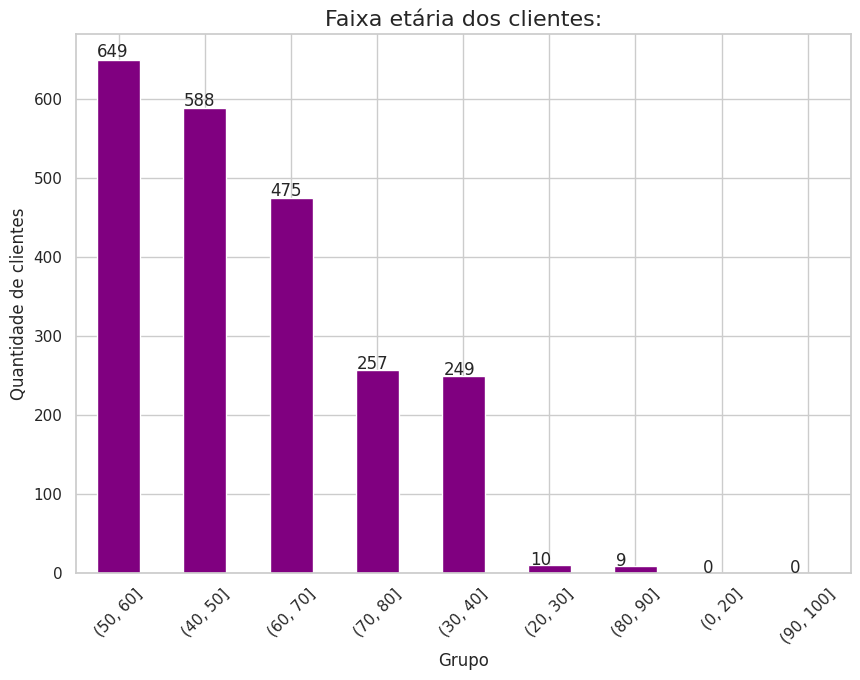

In [12]:
faixa_etaria_clientes = dados["Age_Group"].value_counts()
faixa_etaria_clientes

plt.figure(figsize=(10, 7))
ax = faixa_etaria_clientes.plot(kind='bar', color = 'purple')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.title('Faixa etária dos clientes:', fontsize = 16)
plt.xlabel('Grupo')
plt.ylabel('Quantidade de clientes')
plt.xticks(rotation=45);

Com base nessa classificação por faixa etária podemos verificar de forma clara qual o perfil dos nossos clientes. Isso dá um norte ao nosso departamento de marketing sobre quais campanhas ou promoções podem ter maior efetividade quanto ao público focado, neste caso seriam:









1.   Clientes com idade entre 50-60 anos
2.   Clientes com idade entre 40-50 anos
3.   Clientes com idade entre 60-70 anos
4.   Clientes com idade entre 70-80 anos
5.   Clientes com idade entre 30-40 anos




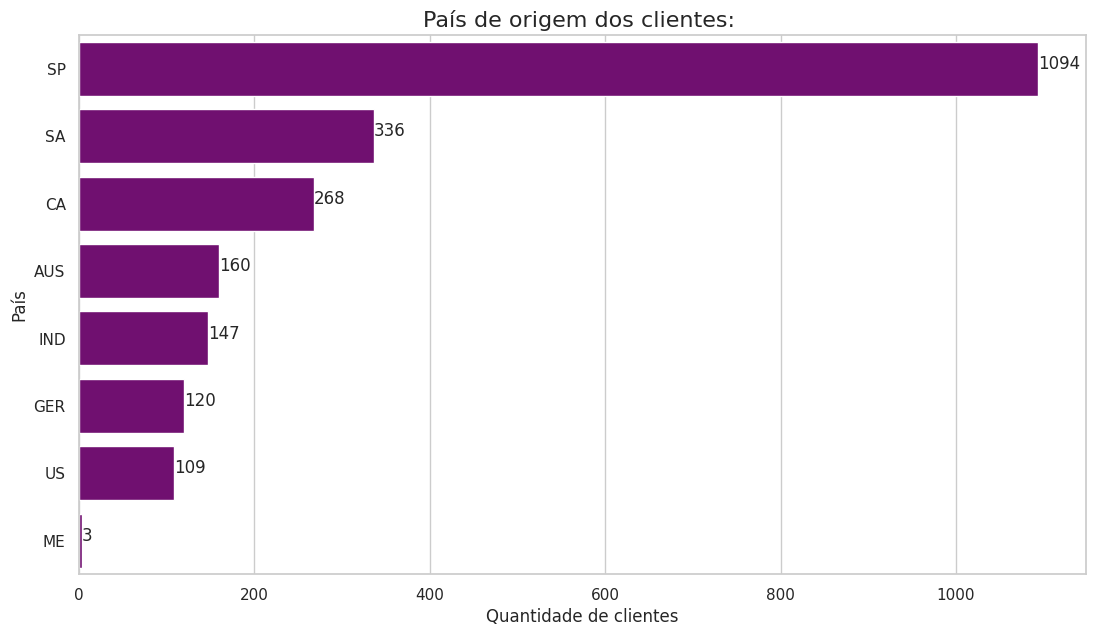

In [13]:
origem_clientes = dados["Country"].value_counts()

y = origem_clientes.index.to_series()
x = origem_clientes

plt.figure(figsize=(13, 7))
#plt.xlim(80, 92)
sns.barplot(x=x, y=y, color='purple')

# Adicionando rótulos aos dados
for index, value in enumerate(origem_clientes):
    plt.text(value, index, str(value))

plt.title('País de origem dos clientes: ', fontsize = 16)
plt.xlabel('Quantidade de clientes')
plt.ylabel('País');

Assim, também podemos verificar o país de origem dos nossos clientes. Sendo possível trabalhar também campanhas e promoções específicas para cada uma das nacionalidades. Segue abaixo a lista dos países, por ordem de quantidade de clientes:



1.   Espanha (SP)
2.   Arábia Saudita (SA)
3.   Canadá (CA)
4.   Austrália (AUS)
5.   Índia (IND)
6.   Alemanha (GER)
7.   Estados Unidos (US)
8.   Monte Negro (ME)


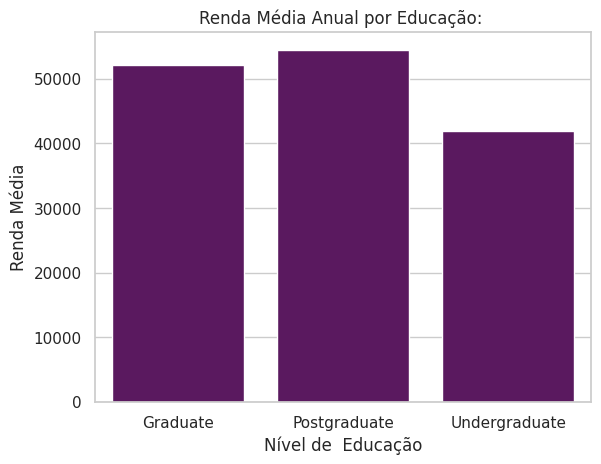

In [14]:
rendaAnual = dados[['Education', 'Income']]

sns.barplot(x='Education', y='Income', data=dados,errorbar=None, color='#640D6B')
plt.title('Renda Média Anual por Educação: ')
plt.xlabel('Nível de  Educação')
plt.ylabel('Renda Média')
plt.show()

<ipython-input-15-7cb9b8a84cb9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Children', y='Total_spending', errorbar=None, data=dados,  palette=cores)


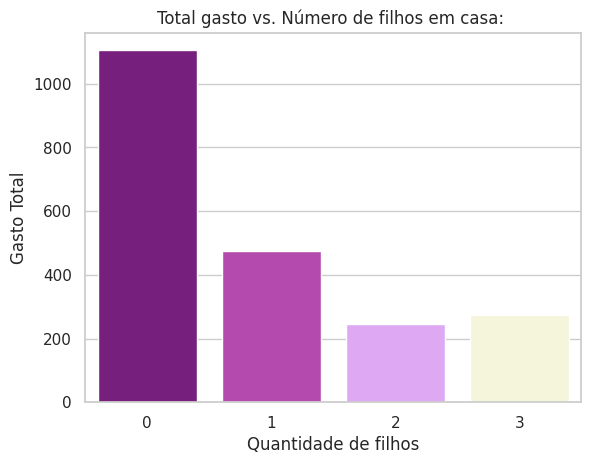

In [15]:
cores = ["#850F8D", "#C738BD", "#E49BFF", "#F8F9D7"]

sns.barplot(x='Children', y='Total_spending', errorbar=None, data=dados,  palette=cores)
plt.title('Total gasto vs. Número de filhos em casa: ')
plt.ylabel('Gasto Total')
plt.xlabel('Quantidade de filhos')
plt.show()

Os clientes que não possuem filhos tendem a consumir mais com os produtos, chegando a ter um gasto total superior a 2x o gasto de quem possui um filho e acima de 4x em relação a quem tem 2 filhos.

**1) Verificando a receita por cada produto:**

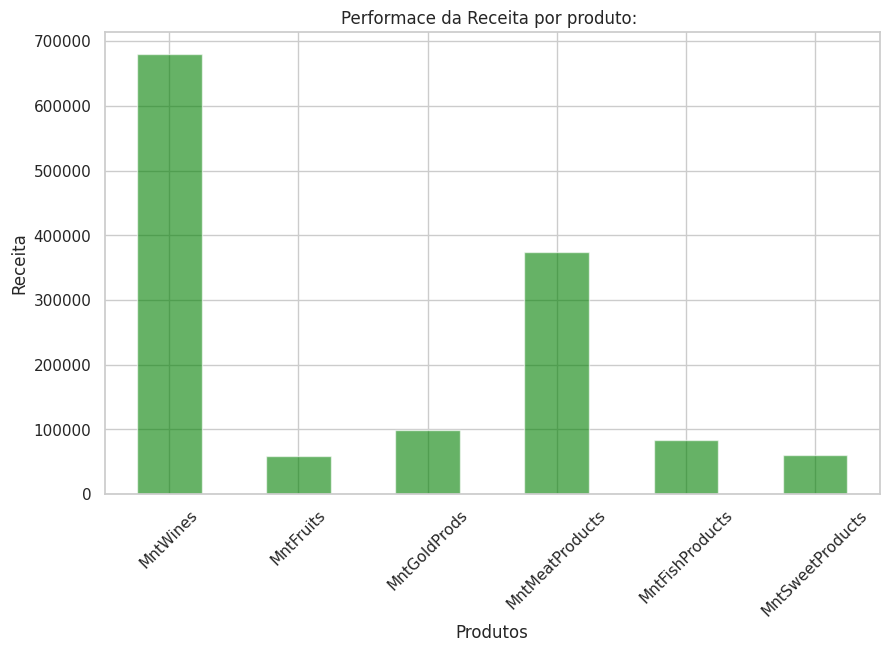

In [16]:
# Seleciona todas as colunas de produtos:
colunas_prods = ['MntWines', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']

# Calcula o retordo de cada produto separado:
retorno_prods = dados[colunas_prods].sum()

# Cria o gráfico com o retorno de cada produto:
plt.figure(figsize=(10, 6))
retorno_prods.plot(kind='bar', color='green', alpha=0.6)
plt.title('Performace da Receita por produto: ')
plt.xlabel('Produtos')
plt.ylabel('Receita')
plt.xticks(rotation=45)
plt.show()

In [17]:
somaRetornos = dados[colunas_prods].sum()
totalRetorno = somaRetornos.sum()
percentualRetorno = round((somaRetornos / totalRetorno) * 100)
percentualRetorno

MntWines            50.0
MntFruits            4.0
MntGoldProds         7.0
MntMeatProducts     28.0
MntFishProducts      6.0
MntSweetProducts     4.0
dtype: float64

Os principais produtos da loja são vinhos, eles são responsáveis por 50% da receita total da loja. Como segundo item de maior receita estão os produtos de carne, representando 28% da receita total.

In [19]:
filtro_campanha1 = dados[dados['AcceptedCmp1'] > 0]
campanha1 = filtro_campanha1
campanha1

clientes_camp1 = campanha1['ID'].count()
receita_camp1 = campanha1['Total_spending'].sum()
ticket_medio_camp1 = round(receita_camp1 / clientes_camp1)
tm_ult_compra_camp1 = round(campanha1['Recency'].mean())
renda_camp1 = round(campanha1['Income'].sum())
qt_filhos_camp1 = campanha1['Children'].sum()
media_idade_camp1 = round(campanha1['Age'].mean())
vendaswines_camp1 = campanha1['MntWines'].sum()
vendasFruits_camp1 = campanha1['MntFruits'].sum()
vendasMeat_camp1 = campanha1['MntMeatProducts'].sum()
vendasFish_camp1 = campanha1['MntFishProducts'].sum()
vendasSweet_camp1 = campanha1['MntSweetProducts'].sum()
vendasGold_camp1 = campanha1['MntGoldProds'].sum()
estado_civil_camp1 = campanha1['Marital_Status'].value_counts()
comprasDesconto_camp1 = campanha1['NumDealsPurchases'].sum()
comprasSite_camp1 = campanha1['NumWebPurchases'].sum()
comprasCatalogo_camp1 = campanha1['NumCatalogPurchases'].sum()
comprasLoja_camp1 = campanha1['NumStorePurchases'].sum()
visitasSite_camp1 = campanha1['NumWebVisitsMonth'].sum()

#------------------------------------------------------------------------------------------------------

filtro_campanha2 = dados[dados['AcceptedCmp2'] > 0]
campanha2 = filtro_campanha2
campanha2

clientes_camp2 = campanha2['ID'].count()
receita_camp2 = campanha2['Total_spending'].sum()
ticket_medio_camp2 = round(receita_camp2 / clientes_camp2)
tm_ult_compra_camp2 = round(campanha2['Recency'].mean())
renda_camp2 = round(campanha2['Income'].sum())
qt_filhos_camp2 = campanha2['Children'].sum()
media_idade_camp2 = round(campanha2['Age'].mean())
vendaswines_camp2 = campanha2['MntWines'].sum()
vendasFruits_camp2 = campanha2['MntFruits'].sum()
vendasMeat_camp2 = campanha2['MntMeatProducts'].sum()
vendasFish_camp2 = campanha2['MntFishProducts'].sum()
vendasSweet_camp2 = campanha2['MntSweetProducts'].sum()
vendasGold_camp2 = campanha2['MntGoldProds'].sum()
estado_civil_camp2 = campanha2['Marital_Status'].value_counts()
comprasDesconto_camp2 = campanha2['NumDealsPurchases'].sum()
comprasSite_camp2= campanha2['NumWebPurchases'].sum()
comprasCatalogo_camp2 = campanha2['NumCatalogPurchases'].sum()
comprasLoja_camp2 = campanha2['NumStorePurchases'].sum()
visitasSite_camp2 = campanha2['NumWebVisitsMonth'].sum()

#------------------------------------------------------------------------------------------------------

filtro_campanha3 = dados[dados['AcceptedCmp3'] > 0]
campanha3 = filtro_campanha3
campanha3

clientes_camp3 = campanha3['ID'].count()
receita_camp3 = campanha3['Total_spending'].sum()
ticket_medio_camp3 = round(receita_camp3 / clientes_camp3)
tm_ult_compra_camp3 = round(campanha3['Recency'].mean())
renda_camp3 = round(campanha3['Income'].sum())
qt_filhos_camp3 = campanha3['Children'].sum()
media_idade_camp3 = round(campanha3['Age'].mean())
vendaswines_camp3 = campanha3['MntWines'].sum()
vendasFruits_camp3 = campanha3['MntFruits'].sum()
vendasMeat_camp3 = campanha3['MntMeatProducts'].sum()
vendasFish_camp3 = campanha3['MntFishProducts'].sum()
vendasSweet_camp3 = campanha3['MntSweetProducts'].sum()
vendasGold_camp3 = campanha3['MntGoldProds'].sum()
estado_civil_camp3 = campanha3['Marital_Status'].value_counts()
comprasDesconto_camp3 = campanha3['NumDealsPurchases'].sum()
comprasSite_camp3 = campanha3['NumWebPurchases'].sum()
comprasCatalogo_camp3 = campanha3['NumCatalogPurchases'].sum()
comprasLoja_camp3 = campanha3['NumStorePurchases'].sum()
visitasSite_camp3 = campanha3['NumWebVisitsMonth'].sum()

#------------------------------------------------------------------------------------------------------

filtro_campanha4 = dados[dados['AcceptedCmp4'] > 0]
campanha4 = filtro_campanha4
campanha4

clientes_camp4 = campanha4['ID'].count()
receita_camp4 = campanha4['Total_spending'].sum()
ticket_medio_camp4 = round(receita_camp4 / clientes_camp4)
tm_ult_compra_camp4 = round(campanha4['Recency'].mean())
renda_camp4 = round(campanha4['Income'].sum())
qt_filhos_camp4 = campanha4['Children'].sum()
media_idade_camp4 = round(campanha4['Age'].mean())
vendaswines_camp4 = campanha4['MntWines'].sum()
vendasFruits_camp4 = campanha4['MntFruits'].sum()
vendasMeat_camp4 = campanha4['MntMeatProducts'].sum()
vendasFish_camp4 = campanha4['MntFishProducts'].sum()
vendasSweet_camp4 = campanha4['MntSweetProducts'].sum()
vendasGold_camp4 = campanha4['MntGoldProds'].sum()
estado_civil_camp4 = campanha4['Marital_Status'].value_counts()
comprasDesconto_camp4 = campanha4['NumDealsPurchases'].sum()
comprasSite_camp4 = campanha4['NumWebPurchases'].sum()
comprasCatalogo_camp4 = campanha4['NumCatalogPurchases'].sum()
comprasLoja_camp4 = campanha4['NumStorePurchases'].sum()
visitasSite_camp4 = campanha4['NumWebVisitsMonth'].sum()

#------------------------------------------------------------------------------------------------------

filtro_campanha5 = dados[dados['AcceptedCmp5'] > 0]
campanha5 = filtro_campanha5
campanha5

clientes_camp5 = campanha5['ID'].count()
receita_camp5 = campanha5['Total_spending'].sum()
ticket_medio_camp5 = round(receita_camp5 / clientes_camp5)
tm_ult_compra_camp5 = round(campanha5['Recency'].mean())
renda_camp5 = round(campanha5['Income'].sum())
qt_filhos_camp5 = campanha5['Children'].sum()
media_idade_camp5 = round(campanha5['Age'].mean())
vendaswines_camp5 = campanha5['MntWines'].sum()
vendasFruits_camp5 = campanha5['MntFruits'].sum()
vendasMeat_camp5 = campanha5['MntMeatProducts'].sum()
vendasFish_camp5 = campanha5['MntFishProducts'].sum()
vendasSweet_camp5 = campanha5['MntSweetProducts'].sum()
vendasGold_camp5 = campanha5['MntGoldProds'].sum()
estado_civil_camp5 = campanha5['Marital_Status'].value_counts()
comprasDesconto_camp5 = campanha5['NumDealsPurchases'].sum()
comprasSite_camp5 = campanha5['NumWebPurchases'].sum()
comprasCatalogo_camp5 = campanha5['NumCatalogPurchases'].sum()
comprasLoja_camp5 = campanha5['NumStorePurchases'].sum()
visitasSite_camp5 = campanha5['NumWebVisitsMonth'].sum()

**2) Quantas pessoas cada campanha alcançou?**

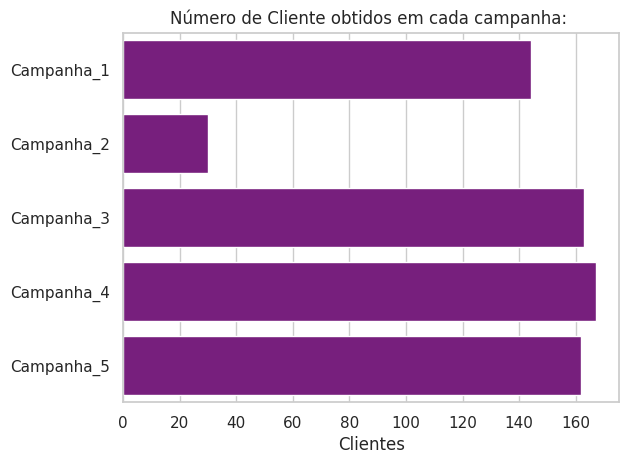

In [20]:
clientesCampanhas = [{'Campanha_1':clientes_camp1, 'Campanha_2':clientes_camp2, 'Campanha_3':clientes_camp3,
                      'Campanha_4':clientes_camp4, 'Campanha_5':clientes_camp5}]
qtClientesCampanhas = pd.DataFrame(clientesCampanhas)
qtClientesCampanhas = qtClientesCampanhas.melt(var_name='Campanha', value_name='Clientes')

ax = sns.barplot(x='Clientes', y='Campanha', data=qtClientesCampanhas, color='#850F8D')
plt.title('Número de Cliente alcançados por campanha:')
ax.set_ylabel('')
plt.show()

 O gráfico mostra um resultado muito parecido em relação a quantidade de clientes que fizeram uma compra após receber uma das campanhas enviadas pela loja. Com exceção para **a campanha Nº2 que teve um resultado quase 4x menor que as outras.**

A Empresa deve investir sua verba de marketing nas demais campanhas que produziram melhores resultados, acredito que seria mais viável para obter um  retorno maior dos clientes.

**3) Qual campanha obteve a maior receita da loja?**

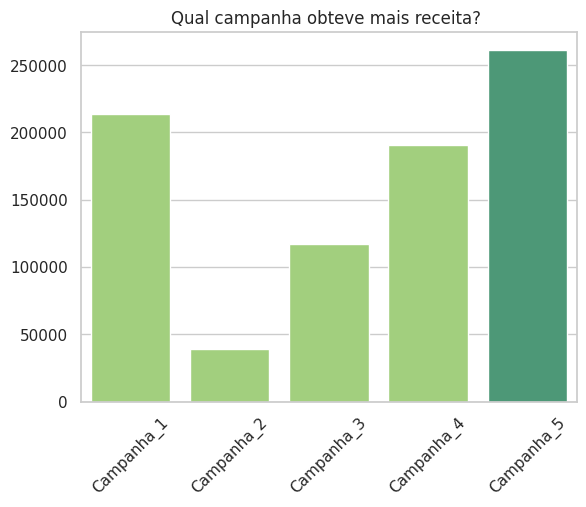

In [65]:
receitaPosCampanhas = [{'Campanha_1':receita_camp1,
                      'Campanha_2':receita_camp2,
                      'Campanha_3':receita_camp3,
                      'Campanha_4':receita_camp4,
                      'Campanha_5':receita_camp5}]
receitasCampanhas = pd.DataFrame(receitaPosCampanhas)
receitasCampanhas = receitasCampanhas.melt(var_name='Campanha', value_name='Receitas')

colors = ['#A1DD70', '#A1DD70', '#A1DD70', '#A1DD70', '#40A578']

ax = sns.barplot(x='Campanha', y='Receitas', data=receitasCampanhas, hue='Campanha', palette=colors, legend=False)
plt.title('Qual campanha obteve mais receita? ')
plt.xticks(rotation=45)
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

Olhando para a receita após cada campanha de marketing, temos um resultado muito bom da campanha Nº5, que com uma quantidade menor de clientes atingidos em relação a campanha Nº4 teve um **retorno 37% maior em comparação**.

Pela receita podemos observar que a campanha Nº2 também não se mostra eficiênte, teve um retorno 4x menor que a campanha Nº5, assim como ocorreu no gráfico de obtenção de clientes.  

**4 - Qual produto foi o mais vendido em cada campanha?**

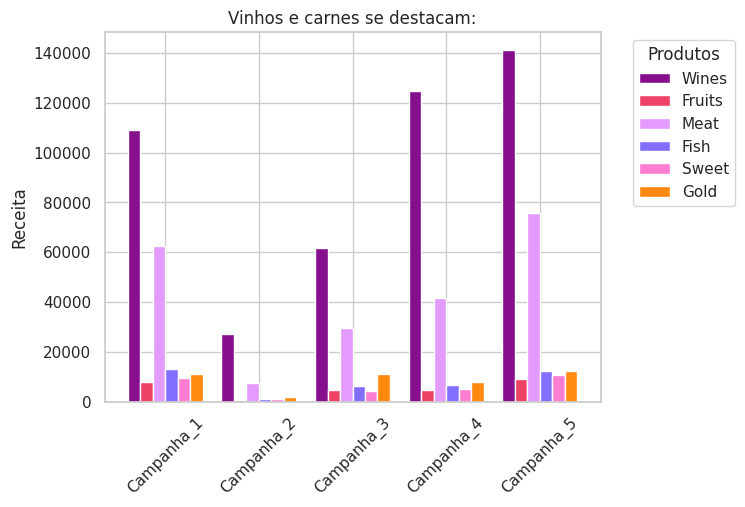

In [85]:
nomeCampanha = {'Campanhas': ['Campanha_1','Campanha_2','Campanha_3','Campanha_4','Campanha_5']}
prodsCampanha1 = {'Campanha_1':[ vendaswines_camp1, vendasFruits_camp1, vendasMeat_camp1, vendasFish_camp1, vendasSweet_camp1, vendasGold_camp1]}
prodsCampanha2 = {'Campanha_2':[ vendaswines_camp2, vendasFruits_camp2, vendasMeat_camp2, vendasFish_camp2, vendasSweet_camp2, vendasGold_camp2]}
prodsCampanha3 = {'Campanha_3':[ vendaswines_camp3, vendasFruits_camp3, vendasMeat_camp3, vendasFish_camp3, vendasSweet_camp3, vendasGold_camp3]}
prodsCampanha4 = {'Campanha_4':[ vendaswines_camp4, vendasFruits_camp4, vendasMeat_camp4, vendasFish_camp4, vendasSweet_camp4, vendasGold_camp4]}
prodsCampanha5 = {'Campanha_5':[ vendaswines_camp5, vendasFruits_camp5, vendasMeat_camp5, vendasFish_camp5, vendasSweet_camp5, vendasGold_camp5]}

df1 = pd.DataFrame(prodsCampanha1)
df2 = pd.DataFrame(prodsCampanha2)
df3 = pd.DataFrame(prodsCampanha3)
df4 = pd.DataFrame(prodsCampanha4)
df5 = pd.DataFrame(prodsCampanha5)

nomes_produtos = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']

df_prodCampanhas = [ df1, df2, df3, df4, df5]
df_prodsVendidos = pd.concat(df_prodCampanhas, axis=1)
df_prodsVendidos.insert(0, 'Products', nomes_produtos)

cores = ['#850F8D', '#EE4266', '#E49BFF', '#836FFF', '#FF7ED4', '#FF8911']

# Gráfico de barras agrupadas
df_prodsVendidos.set_index('Products').T.plot(kind='bar', width=0.8, stacked=False, color=cores)
plt.xlabel('')
plt.ylabel('Receita')
plt.title('Vinhos e carnes se destacam:')
plt.legend(title='Produtos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

Em destaque temos **o vinho como produto que mais gera receita** em todas as campanhas da loja, isso pode ser explicado por alguns fatores: **(1)** Uma demanda maior por conta do perfil dos clientes da loja, pessoas com idade superior a 30 anos por exemplo. **(2)** **É um produto que não tem um bem-substituto direto no catalogo de vendas da loja**, como a carne e peixe, isso concentra o consumo de bebidas nos vinhos e faz com que suas vendas sejam sempre mais altas. **(3)** Também pode ser por conta de um foco da empresa neste item em especial, com promoções e descontos.

**5 - Qual perfil de clientes comprou mais produtos depois de receber uma das campanhas?**

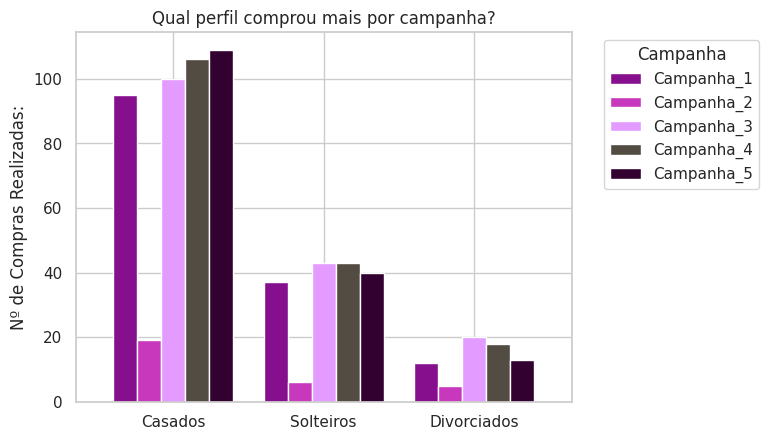

In [23]:
estadoCivil_Camps = {'Campanhas': ['Campanha_1','Campanha_2','Campanha_3','Campanha_4','Campanha_5']}
total_casados = {'Casados':[estado_civil_camp1[0], estado_civil_camp2[0], estado_civil_camp3[0], estado_civil_camp4[0], estado_civil_camp5[0]]}
total_solteiros = {'Solteiros':[estado_civil_camp1[1], estado_civil_camp2[1], estado_civil_camp3[1], estado_civil_camp4[1], estado_civil_camp5[1]]}
total_divorciados = {'Divorciados':[estado_civil_camp1[2], estado_civil_camp2[2], estado_civil_camp3[2], estado_civil_camp4[2], estado_civil_camp5[2]]}

df_estadoCivil = pd.DataFrame(estadoCivil_Camps)
df_total_casados = pd.DataFrame(total_casados)
df_total_solteiros = pd.DataFrame(total_solteiros)
df_total_divorciados = pd.DataFrame(total_divorciados)

df_ECs = [df_estadoCivil, df_total_casados, df_total_solteiros, df_total_divorciados]
dadosEstadoCivil = pd.concat(df_ECs, axis=1)
dadosEstadoCivil = dadosEstadoCivil.rename(columns={1:'Casado'})
dadosEstadoCivil

cores = ['#850F8D', '#C738BD', '#E49BFF', '#524C42', '#32012F']

dadosEstadoCivil.set_index('Campanhas').T.plot(kind='bar', width=0.8, stacked=False, color=cores)
plt.xlabel('')
plt.ylabel('Nº de Compras Realizadas:')
plt.title('Qual perfil comprou mais por campanha?')
plt.legend(title='Campanha', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=360)
plt.show()

Nas cinco campanhas realizadas, o perfil de clientes **casados comprou pelo menos 2x mais**, que o perfil de clientes solteiros que é o segundo que mais efetuou compras após as campanhas. Os divorciados representam o grupo que menos realiza uma venda.



**6 - Qual a campanha teve mais vendas pelo site?**

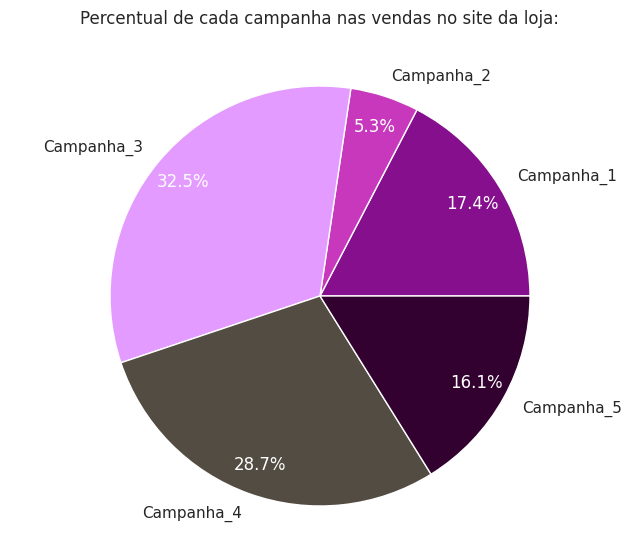

In [63]:
visitasSite = visitasSite_camp1 + visitasSite_camp2 + visitasSite_camp3 + visitasSite_camp4 + visitasSite_camp5
visitas_camp1 = round(((visitasSite_camp1 / visitasSite) *100),2)
visitas_camp2 = round(((visitasSite_camp2 / visitasSite) *100),2)
visitas_camp3 = round(((visitasSite_camp3 / visitasSite) *100),2)
visitas_camp4 = round(((visitasSite_camp4 / visitasSite) *100),2)
visitas_camp5 = round(((visitasSite_camp5 / visitasSite) *100),2)

cores = ['#850F8D', '#C738BD', '#E49BFF', '#524C42', '#32012F']

vendas_site_camp = ['Campanha_1','Campanha_2','Campanha_3','Campanha_4','Campanha_5']
perc_vendas_site = [visitas_camp1, visitas_camp2, visitas_camp3, visitas_camp4, visitas_camp5]

plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(perc_vendas_site, labels=vendas_site_camp, autopct='%1.1f%%', pctdistance=0.85, labeldistance=1.1, colors=cores)
for autotext in autotexts:
    autotext.set_color('white')

plt.title('Percentual de cada campanha nas vendas no site da loja:', pad=30)
plt.axis('equal')
plt.show()


Quando observados os resultados obtidos no site da loja, temos a campanha de marketing **Nº3 e a Nº4 desempenhando muito melhor** que as demais, somadas as duas representam 61,2% de todas as vendas do site.

Em uma próxima campanha de marketing a empresa pode considerar mesclar elementos das duas campanhas com destaque online (Nº3 e Nº4), com as que desempenharam melhor em receita no geral (Nº1 e Nº5) visando melhorar também o online.  